## for numerical operations, arrays, matrices and linear algebra

In [1]:
import numpy as np

## for data loading, cleaning, manipulation, and analysis

In [2]:
import pandas as pd

## for plotting graphs(line, bar, scatter, histogram, etc)

In [3]:
import matplotlib.pyplot as plt

## based on matplotlib; used for statistical graphics and better visuals

In [4]:
import seaborn as sns

## for data scaling, normalization, label encoding(preprocessing)

In [5]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

## splitting data into training and testing sets

In [6]:
from sklearn.model_selection import train_test_split

## to fill in missing values using mean, median, mode

In [7]:
from sklearn.impute import SimpleImputer

## regression modeling(linear regression)

In [8]:
from sklearn.linear_model import LinearRegression

## binary calssification(logistic regression)

In [9]:
from sklearn.linear_model import LogisticRegression

## tree based calssification

In [10]:
from sklearn.tree import DecisionTreeClassifier

## ensemble learning

In [11]:
from sklearn.ensemble import RandomForestClassifier

## classification using hyperplanes

In [12]:
from sklearn.svm import SVC

## for classification model evaluation

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

In [14]:
from imblearn.over_sampling import RandomOverSampler

In [15]:
from sklearn.naive_bayes import GaussianNB

In [16]:
from sklearn.svm import SVC

In [19]:
import tensorflow as tf

In [20]:
df = pd.read_csv('diabetes.csv')

In [21]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [22]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [23]:
df['Outcome'].unique()

array([1, 0])

In [24]:
df['Outcome'] = (df['Outcome'] == 1).astype(object)

In [25]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


In [26]:
df['Outcome'] = (df['Outcome'] == 1).astype(int)

In [27]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


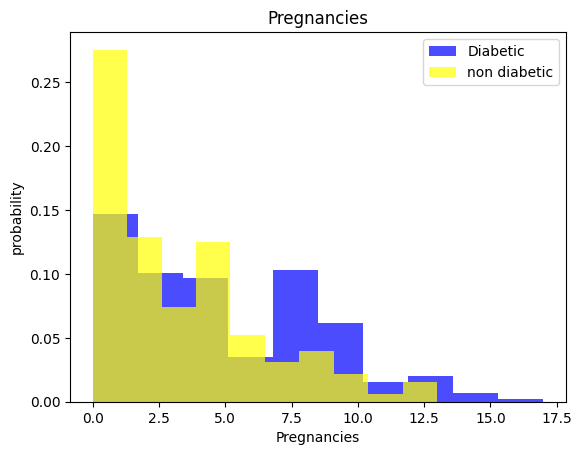

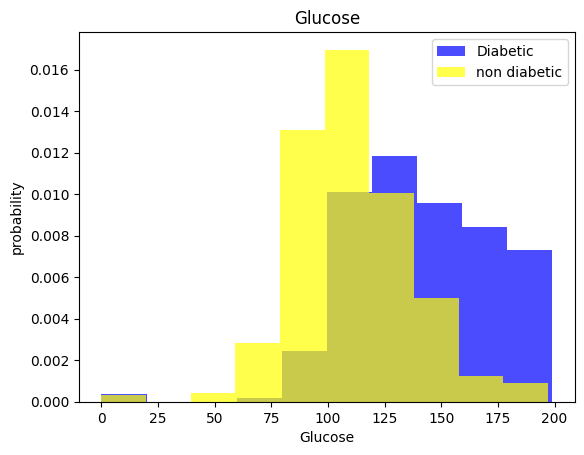

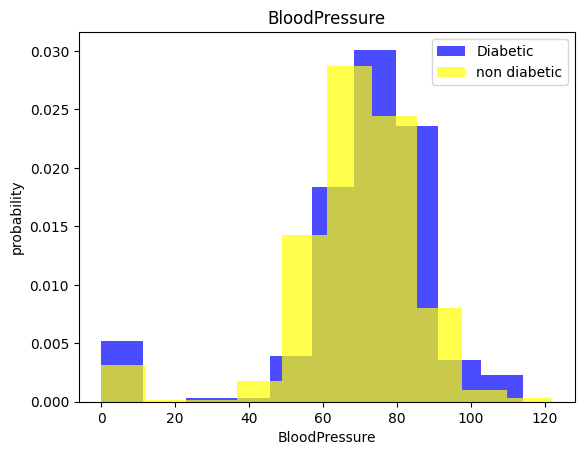

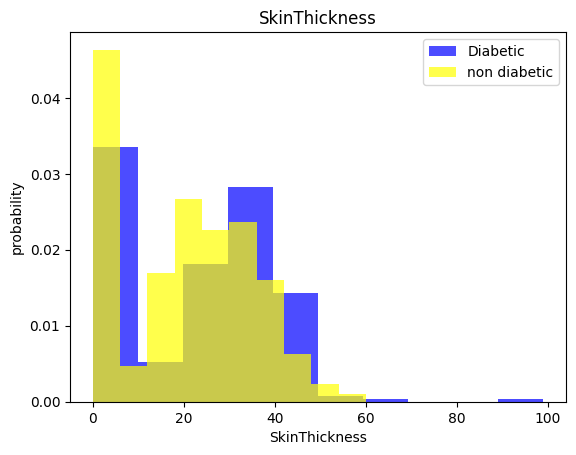

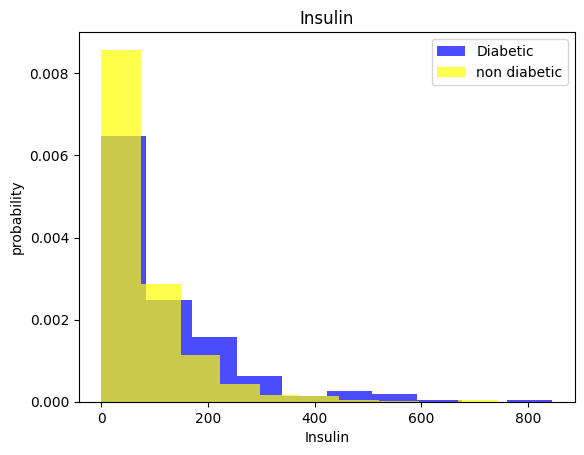

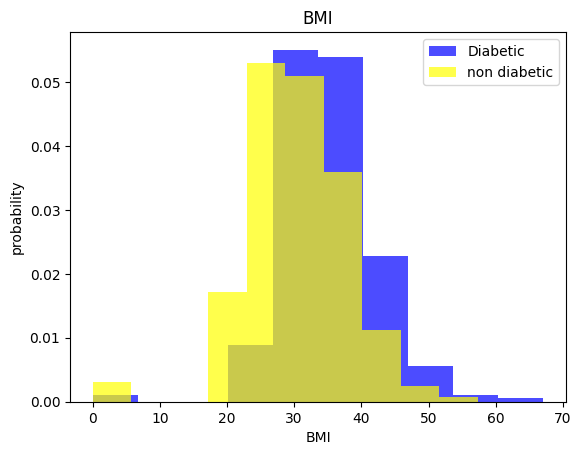

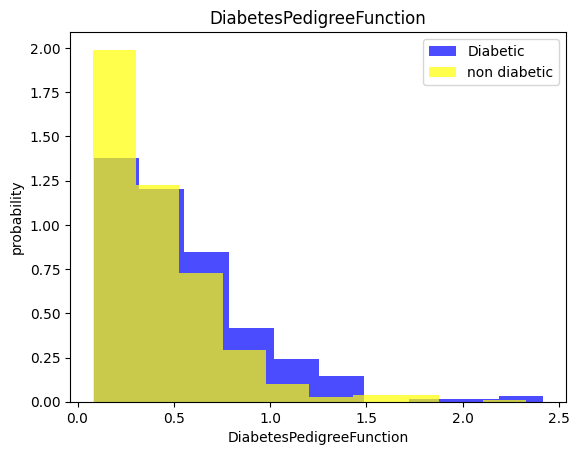

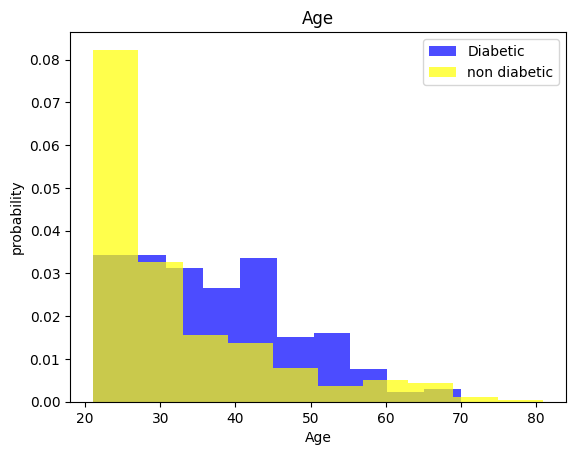

In [28]:
for label in df.columns[:-1]:
  plt.hist(df[df['Outcome'] == 1][label], color='blue', label='Diabetic', alpha=0.7, density=True)
  plt.hist(df[df['Outcome'] == 0][label], color='yellow', label='non diabetic', alpha=0.7, density=True)
  plt.title(label)
  plt.ylabel('probability')
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [29]:
train_df, test_df = train_test_split(df, test_size=0.2, stratify=df["Outcome"], random_state=42)
train_df, valid_df = train_test_split(train_df, test_size=0.25, stratify=train_df["Outcome"], random_state=42)

In [30]:
def scale_dataset(dataframe, oversample=False):
  x = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  x = scaler.fit_transform(x)

  if oversample:
    ros = RandomOverSampler()
    x, y = ros.fit_resample(x, y)
    
  data = np.hstack((x, np.reshape(y, (-1, 1))))
    
  return data, x, y

In [31]:
train_df, x_train_df, y_train_df = scale_dataset(df, oversample=True)

In [32]:
valid_df, x_valid_df, y_valid_df = scale_dataset(df, oversample=False)

In [33]:
test_df, x_test_df, y_test_df = scale_dataset(df, oversample=False)

In [34]:
len(y_train_df)

1000

In [35]:
sum(y_train_df == 1) 

np.int64(500)

In [36]:
sum(y_train_df == 0)

np.int64(500)

## knn

In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(x_train_df, y_train_df)

KNeighborsClassifier(n_neighbors=1)

In [39]:
y_pred = knn_model.predict(x_test_df)

In [40]:
print(classification_report(y_test_df, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       500
           1       1.00      1.00      1.00       268

    accuracy                           1.00       768
   macro avg       1.00      1.00      1.00       768
weighted avg       1.00      1.00      1.00       768



In [41]:
y_pred

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

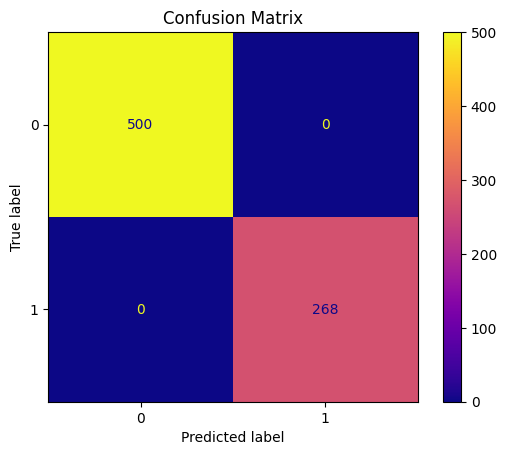

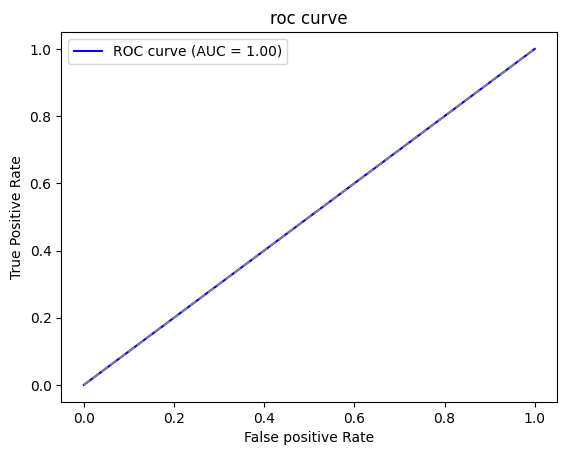

In [42]:
y_pred = knn_model.predict(x_test_df)
cm = confusion_matrix(y_test_df, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot(cmap=plt.cm.plasma)
plt.title("Confusion Matrix")
plt.show()
y_prob = knn_model.predict_proba(x_test_df)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_df,y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, fpr, color = 'blue',
label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("False positive Rate")
plt.ylabel("True Positive Rate")
plt.title("roc curve")
plt.legend()
plt.show()

## naive Bayes

In [43]:
nb_model = GaussianNB()
nb_model.fit(x_train_df, y_train_df)

GaussianNB()

In [44]:
y_pred = nb_model.predict(x_test_df)

In [45]:
print(classification_report(y_test_df, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80       500
           1       0.63      0.69      0.66       268

    accuracy                           0.75       768
   macro avg       0.73      0.74      0.73       768
weighted avg       0.76      0.75      0.75       768



## log regression

In [46]:
lg_model = LogisticRegression()
lg_model.fit(x_train_df, y_train_df)

LogisticRegression()

In [47]:
y_pred = lg_model.predict(x_test_df)

In [48]:
print(classification_report(y_test_df, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.76      0.80       500
           1       0.63      0.75      0.68       268

    accuracy                           0.76       768
   macro avg       0.74      0.75      0.74       768
weighted avg       0.77      0.76      0.76       768



 ## SVM

In [49]:
sv_model = SVC()
sv_model.fit(x_train_df, y_train_df)

SVC()

In [50]:
y_pred = sv_model.predict(x_test_df)

In [51]:
print(classification_report(y_test_df, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.80      0.85       500
           1       0.69      0.83      0.75       268

    accuracy                           0.81       768
   macro avg       0.79      0.82      0.80       768
weighted avg       0.83      0.81      0.81       768



In [57]:
import tensorflow as tf

In [59]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4)) 
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel("Epoch")
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel("Epoch")
  ax2.set_ylabel("accuracy")  
  ax2.grid(True)
    
  plt.show()

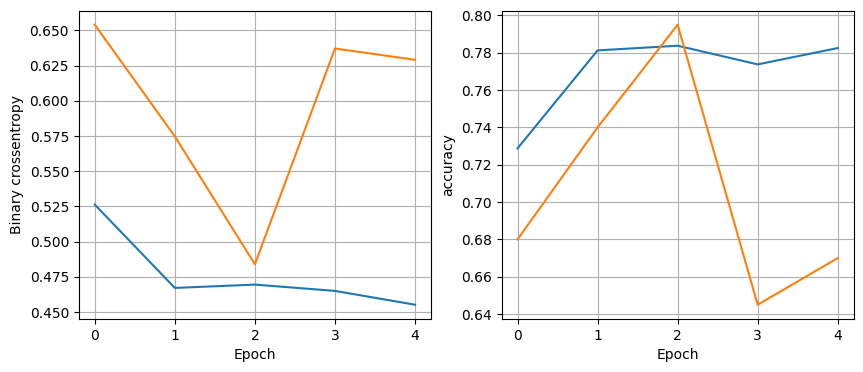

In [68]:
plot_history(history)

In [71]:
def train_model(x_train_df, y_train_df, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(8,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes, activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])
    
  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy',
                   metrics=['accuracy'])
  history = nn_model.fit(x_train_df, y_train_df, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0)  
    
  return nn_model, history

In [53]:
y = df['Outcome'].values

In [54]:
print("x_tari_shape:", x_train_df.shape)
print("y_tari_shape:", y_train_df.shape)

x_tari_shape: (1000, 8)
y_tari_shape: (1000,)


In [55]:
for col in df.columns:
    if df[col].apply(lambda x:
isinstance(x, list)).any():
        print(f"Column {col} contains lists")

In [56]:
x_train_df = np.array(x_train_df, dtype=float)
x_test_df = np.array(x_test_df, dtype=float)
print(x_train_df.shape, x_train_df.dtype)

(1000, 8) float64


In [57]:
y_train_df = np.array(y_train_df, dtype=float).ravel()
y_test_df = np.array(y_test_df, dtype=float).ravel()

32 nodes, dropout 0.1, lr 0.01, batch size 32


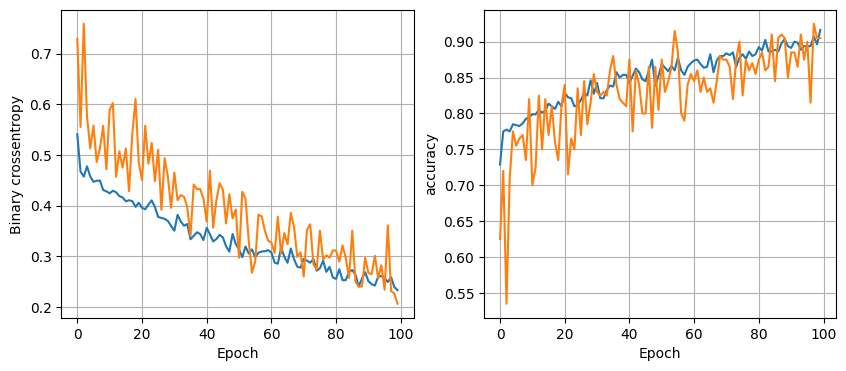

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9427 - loss: 0.1609  


In [76]:
least_val_loss = float('inf')
least_loss_model = None
epochs=100
for num_nodes in [32]:
  for dropout_prob in [0.1]:
    for lr in [0.01]:
      for batch_size in [32]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}") 
        model, history = train_model(x_train_df, y_train_df, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(x_valid_df, y_valid_df)
        if isinstance(val_loss, list):
            val_loss = val_loss[0]

        if least_loss_model is None or val_loss < least_val_loss:
            least_val_loss = val_loss
            least_loss_model = model

In [77]:
y_pred = least_loss_model.predict(x_test_df)
y_pred = (y_pred > 0.5)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [66]:
y_pred

array([[ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [

In [78]:
print(classification_report(y_test_df, y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.95      0.96       500
         1.0       0.91      0.93      0.92       268

    accuracy                           0.94       768
   macro avg       0.94      0.94      0.94       768
weighted avg       0.94      0.94      0.94       768



In [82]:
model.save("diabetes_model.keras")
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("diabetes_model.tflite", "wb") as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\User\AppData\Local\Temp\tmpd_azgccu\assets


INFO:tensorflow:Assets written to: C:\Users\User\AppData\Local\Temp\tmpd_azgccu\assets


Saved artifact at 'C:\Users\User\AppData\Local\Temp\tmpd_azgccu'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 8), dtype=tf.float32, name='keras_tensor_24')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  1708758329360: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1708758323984: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1708758324368: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1708758325136: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1708758323024: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1708758325520: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [ ]:
print("hello")

In [ ]:
print("haello")

In [ ]:
 if val_loss < least_val_loss:
            least_val_loss = val_loss
            model.save("best_model.h5")

In [1]:
print("hello")

hello
